In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
transactions = pd.read_csv(r"transactions.csv")
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")
mcc = pd.read_csv('mcc_codes.csv', sep = ';')
trans_types = pd.read_csv('trans_types.csv', sep = ';')
test_sample_submission = pd.read_csv('test_sample_submission.csv')

In [4]:
transactions.head()

,client_id,trans_time,mcc_code,trans_type,amount,term_id,trans_city
0,d1bbbc9a0e0410d3cf12a3d2f44f3450,35 08:24:41,4829,2370,-1808.56,NaN,Tver
1,81c7349f7bdcb661bc7d5f5f0fdac6aa,351 13:27:15,6011,7010,7954.51,442207,Kazan
2,fc0c7c937f139bd6d1c5b5d0a0023dd3,150 16:03:59,6011,2010,-12293.56,NaN,Khabarovsk
3,3495487d5beaa5caaa0682fddc38379a,373 11:54:12,6010,7070,49.52,888987,Kaliningrad
4,07e279042b1da23710fa2f65034d30b9,340 13:11:45,6010,7070,45.29,888918,Saint Petersburg


In [5]:
train.head()

,Unnamed: 0,client_id,gender
0,0,c5f18a1d1d83fda62e51e6ae1d7b8911,1
1,1,4b6861803556de90249e13d7cf66f0a9,0
2,2,7d3f908e1cd1e3624a1445df5e04c4fa,1
3,3,40c585a809c1bd17dc6d283d61acd2d2,0
4,4,5bd2ff9f6c591353577488b0dfca6dea,0


In [15]:
mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [16]:
trans_types.head()

,trans_type,trans_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [19]:
test_sample_submission.head()

,Unnamed: 0,client_id,probability
0,0,002218c52073faaf23bb26df2cffb138,0.297635
1,1,0069d4050c7aeb341317e2e125e8fd2e,0.402542
2,2,0083fb89aea18c408a5534cdd38d7692,0.393863
3,3,014021fa559786c81e9e1d48d378aabb,0.403755
4,4,01759f92152bbb3de79f9493a4a5cd6d,0.444039


In [35]:
transactions_merged = pd.merge(transactions, train, on=['client_id'])

In [39]:
transactions_merged['Day'] = transactions_merged['trans_time'].str[:-9].astype('int')
transactions_merged.drop(columns = ['Unnamed: 0'], inplace = True)
transactions_merged['Hours'] = transactions['trans_time'].str[-2:].astype('int')/3600 + transactions['trans_time'].str[-5:-3].astype('int')/60 + transactions['trans_time'].str[-8:-6].astype('int')

In [40]:
transactions_merged.head()

,client_id,trans_time,mcc_code,trans_type,amount,term_id,trans_city,gender,Day,Hours
0,d1bbbc9a0e0410d3cf12a3d2f44f3450,35 08:24:41,4829,2370,-1808.56,NaN,Tver,0,35,8.411389
1,d1bbbc9a0e0410d3cf12a3d2f44f3450,105 12:57:32,4829,2370,-3390.41,NaN,Tver,0,105,13.454167
2,d1bbbc9a0e0410d3cf12a3d2f44f3450,455 19:32:01,4814,1030,-144.50,889003,Tver,0,455,16.066389
3,d1bbbc9a0e0410d3cf12a3d2f44f3450,83 09:22:26,6011,2010,-3542.30,NaN,Tver,0,83,11.903333
4,d1bbbc9a0e0410d3cf12a3d2f44f3450,74 13:31:57,6011,2010,-3542.70,NaN,Tver,0,74,13.195833


In [41]:
transactions_merged['term_id'].isna().value_counts()

False    1927684
True     1311048
Name: term_id, dtype: int64

<AxesSubplot:xlabel='trans_city', ylabel='Count'>

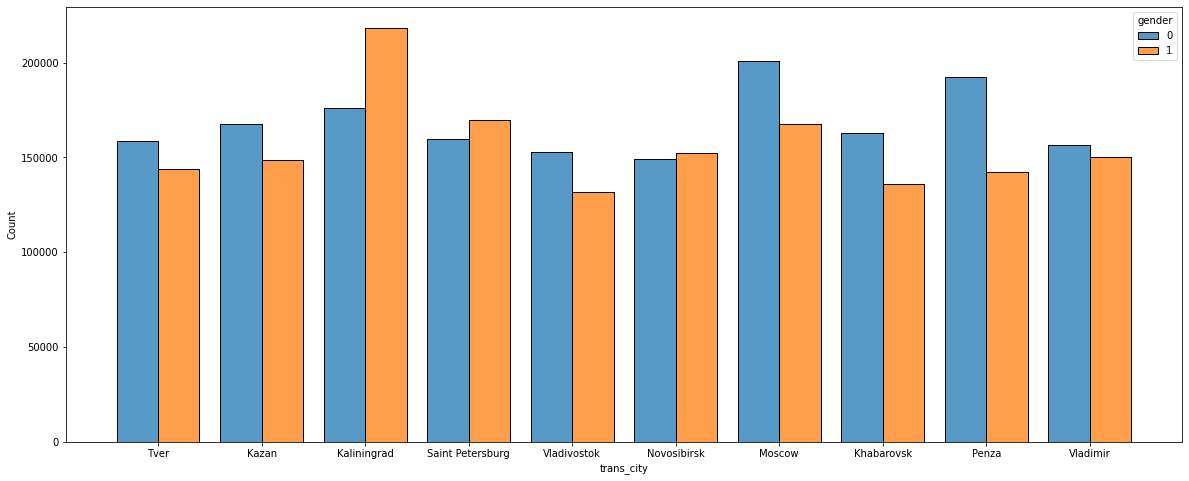

In [42]:
plt.figure(figsize=(20,8))
sns.histplot(data=transactions_merged, x = 'trans_city', hue = 'gender', multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='trans_city', ylabel='Count'>

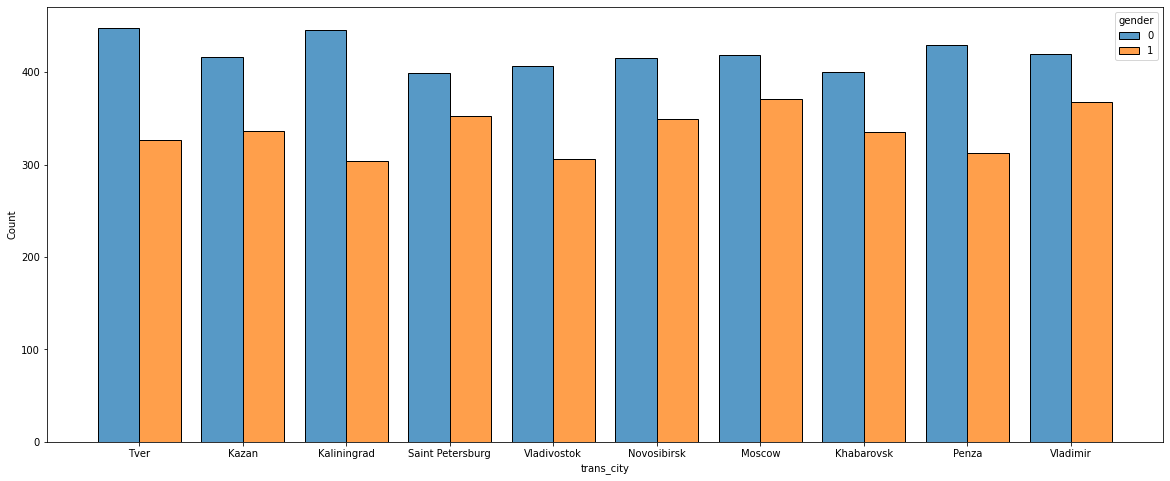

In [43]:
newdf = transactions_merged.drop_duplicates( 
  subset = ['client_id', 'trans_city'], 
  keep = 'last').reset_index(drop = True) 
plt.figure(figsize=(20,8))
sns.histplot(data=newdf, x = 'trans_city', hue = 'gender', multiple="dodge", shrink=.8)

In [168]:
newdf.value_counts('gender')

gender
0    4199
1    3361
dtype: int64